In [46]:
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from xmitgcm import utils
from xmitgcm import open_mdsdataset
from xgcm import Grid
from xhistogram.xarray import histogram

In [47]:
import dask
from dask.diagnostics import ProgressBar

In [52]:
data_dir = "/pool001/xruan/RT_canyon_hydrostatic/diag/"
grid_dir = "/pool001/xruan/RT_canyon_hydrostatic/input/"
ds = open_mdsdataset(data_dir, grid_dir = grid_dir, iters="all", ignore_unknown_vars=True, prefix=["TS_inst", "tracer_inst"], delta_t = 5.)
grid = Grid(ds, periodic=['X', 'Y'])
ds['time'] = ds['time'] + np.datetime64('2021-06-27T00:00:00')

#### Generate hypothetical section

In [53]:
ncasts = 20
x = np.linspace(-12, -11.9, ncasts)
y = np.linspace(54.2, 54.3, ncasts)

start = pd.Timestamp('2021-07-01T04:00:00')
end = pd.Timestamp('2021-07-03T04:00:00')
t = pd.to_datetime(np.linspace(start.value, end.value, ncasts))

trajectory = xr.Dataset({
    'XC': xr.DataArray(x, dims='casts'),
    'YC': xr.DataArray(y, dims='casts'),
    'time': xr.DataArray(t, dims='casts')
})

In [54]:
ds = ds.sel(time=slice(t[0], t[-1]))

In [55]:
with ProgressBar():
    tr_sec = ds.sel(trajectory, method="nearest").compute()

[########################################] | 100% Completed |  2min 30.5s


(54.175, 54.35)

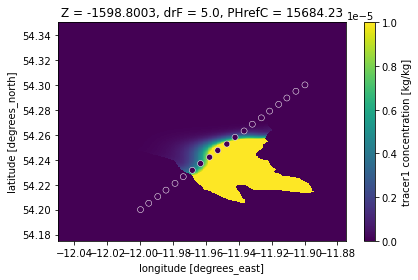

In [59]:
pc = ds['TRAC01'].sel(Z=-1800, time=t[ncasts//2], method="nearest").plot(vmin=0, vmax=1e-5)
pc.colorbar.remove()
sc = tr_sec.sel(Z=-1600, method="nearest").plot.scatter(x='XC', y='YC', hue="TRAC01", vmin=0, vmax=1e-5, edgecolor="w", linewidth=0.5)

plt.tight_layout()
plt.xlim(-12.05, -11.875)
plt.ylim(54.175, 54.35)

(-2200.0, -1000.0)

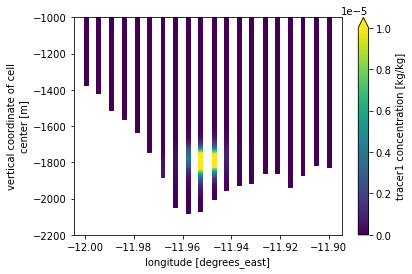

In [57]:
tr_sec.where(tr_sec.hFacC!=0.).plot.scatter(x="XC", y="Z", marker='s', s=15., hue="TRAC01", vmin=0, vmax=1.e-5)
plt.ylim(-2200, -1000)

Text(0.5, 1.0, 'Simulated FCTD section')

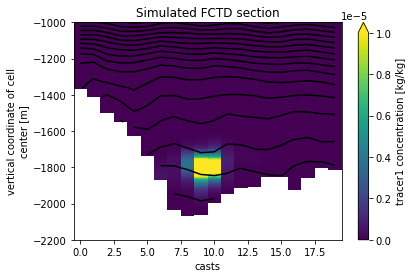

In [73]:
tr_sec['TRAC01'].where(tr_sec.hFacC!=0.).plot(x='casts', vmin=0, vmax=1.e-5)
tr_sec['THETA'].where(tr_sec.hFacC!=0.).plot.contour(x='casts', colors="k", levels=np.arange(3, 8, 0.25))
plt.ylim(-2200, -1000)
plt.title("Simulated FCTD section")